# Part 2 Analysis

We would like to explore the effect of fertility rate and migration rate on population growth.  In part one of this analysis, we have chosen to use
the fertility rate and net migration values from our source dataset([Global Life Expectancy at Birth on Kaggle](https://www.kaggle.com/datasets/programmerrdai/global-life-expectancy-at-birth)).  In particular, we used the data for Canada.  Now in part two of the analysis, we are using the crude birth rate (no. of births per 1000 people) and calculating the net migration rate (net migration divided by total population, as described [here](https://en.wikipedia.org/wiki/Net_migration_rate)).  This way all our datasets are relative to the total population.  

However, after experimenting with plotting the data as is, we found out the scales of the three series (birth rate, net migration rate, and population growth) are quite different.  So we cannot see the trends of all three lines at the same time.  We have decided to normalize all three sets of data by using the max method (as described [here](https://clevertap.com/blog/visualizing-and-comparing-trends-with-vastly-varying-scale/)).  This way the values in each set of data is a fraction between 0 and 1, and it is possible to see the trend of each graph and do comparison.  They are referred as the adjusted values in the graphs.

The results are plotted in Figure1 below.  The red line shows the trend of the population growth over the years specified on the x-axis.  The blue line shows that of the birth rate.  The green line shows the net migration rate.  From 1960 to around 1966, the population growth seems to be more dependent on the birth rate versus the net migration rate, as the shape of that portion of the red line (population growth) is more similar to that of the blue line (birth rate).  But after that point, the population growth seems to be more affected by the net migration rate than the birth rate.  The red line (population growth) and the green line (net migration) appear to have similar trends after 1966. 

We have also investigated the same datasets from another country, Japan, that is known for their stricter immigration policies.  The results are plotted in Figure2 below.  The same colors are used to represent each series as Figure1.  As shown in the figure, the general shape of the red line (population growth) is similar to that of the blue line (birth rate).  The effect of the green line (net migration) on the red line is observed around 1970 and 1971.  As expected, the birth rate in Japan is dominantly affected by the birth rate, and not so much by the net migration rate.



 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Plotting the data for Canada

In [6]:
# Load the datafile and pick out desired columns in dataframe
df = pd.read_csv(r'..\data\processed\Canada-Select-Variables-In-Columns.csv')
df = df.rename(columns = {
                'Population growth (annual %)':'population_growth',
                'Net migration':'net_migration',
                'Year':'year',
                'Total population':'total_population',
                'Crude birth rate':'birth_rate'
})

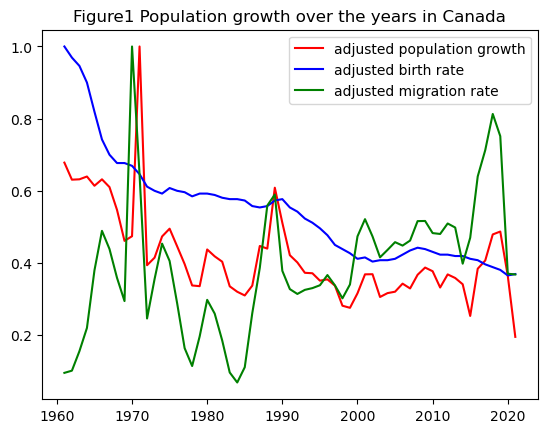

In [12]:
#https://clevertap.com/blog/visualizing-and-comparing-trends-with-vastly-varying-scale/
# In order to compare the trends of the population growth, net migration rate and the birth rate on the same graph, 
# we need to normalize the values of all three series by using the max method, as described in the blog above.  
# This way we are dealing with relative numbers in all three series, with a max value of 1 in each line.

max_pop_growth = df['population_growth'].max()
y_adj_pop_growth = df['population_growth']/max_pop_growth
max_mig_rate = pd.Series(df['net_migration']/df['total_population']).max()
y_adj_mig_rate = df['net_migration']/df['total_population']/max_mig_rate
max_birth_rate = df['birth_rate'].max()
y_adj_birth_rate = df['birth_rate']/max_birth_rate

x = df['year']

plt.plot(x, y_adj_pop_growth, 'r', label='adjusted population growth')
plt.plot(x, y_adj_birth_rate, 'b', label = 'adjusted birth rate')
plt.plot(x, y_adj_mig_rate, 'g', label = 'adjusted migration rate')

plt.legend(loc = 'upper right')
plt.title('Figure1 Population growth over the years in Canada', loc = 'center')
plt.show()



## Plotting the data for Japan

In [8]:
df_j = pd.read_csv(r'..\data\processed\Japan-Select-Variables-In-Columns.csv')
df_j = df_j.rename(columns = {
                'Population growth (annual %)':'population_growth',
                'Net migration':'net_migration',
                'Year':'year',
                'Total population':'total_population',
                'Crude birth rate':'birth_rate'

})

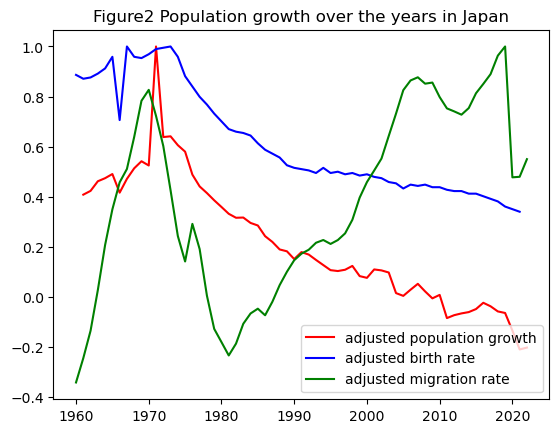

In [10]:
#https://clevertap.com/blog/visualizing-and-comparing-trends-with-vastly-varying-scale/
max_pop_growth_j = df_j['population_growth'].max()
y_adj_pop_growth_j = df_j['population_growth']/max_pop_growth_j
max_mig_rate_j = pd.Series(df_j['net_migration']/df_j['total_population']).max()
y_adj_mig_rate_j = df_j['net_migration']/df_j['total_population']/max_mig_rate_j
max_birth_rate_j = df_j['birth_rate'].max()
y_adj_birth_rate_j = df_j['birth_rate']/max_birth_rate_j

x_j = df_j['year']

plt.plot(x_j, y_adj_pop_growth_j, 'r', label='adjusted population growth')
plt.plot(x_j, y_adj_birth_rate_j, 'b', label = 'adjusted birth rate')
plt.plot(x_j, y_adj_mig_rate_j, 'g', label = 'adjusted migration rate')

plt.legend(loc = 'lower right')
plt.title('Figure2 Population growth over the years in Japan', loc = 'center')
plt.show()
